#  Churn prediction <font color=orange>(Orange Telecom dataset)</font>
## using Python ML <font color=blue>scikit-learn</font> http://scikit-learn.org/stable/

![Image of Sklearn](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)
![Image of Sklearn](http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001_carousel.png)


### see http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html

---

# Reading *churn_bigml* data from a Shared Google Drive .tar file

In [1]:
! pip install googledrivedownloader

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1zmriEGA3z4WAOmscdEfgzcliAUsNaVoj',
                                    dest_path='./churn-bigml.zip',
                                    unzip=False)


In [3]:
! unzip -o churn-bigml.zip

Archive:  churn-bigml.zip
  inflating: churn-bigml-20.csv      
  inflating: churn-bigml-80.csv      


## <font color=#FF103>TO DO: read churn-bigml-80.csv into a Pandas DataFrame</font>

In [0]:
# from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


CV_data = pd.read_csv("churn-bigml-80.csv")

In [5]:
CV_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## <font color=#FF103>TO DO: how many features (columns) do we have? </font>

In [6]:

col_names = CV_data.columns.tolist()

print("There are : " , len(col_names) ,' columns')
print('\nColumn names: \n {}'.format(col_names))



('There are : ', 20, ' columns')

Column names: 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


## <font color=#FF103>TO DO: how many users and how many quit and don't quit</font>

In [7]:
CV_data.groupby(['Churn'])['Churn'].count()

Churn
False    2278
True      388
Name: Churn, dtype: int64

In [8]:
CV_data['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [9]:
CV_data.groupby(['Churn'])['Churn'].describe()

,count,unique,top,freq
Churn,,,,
False,2278,1,False,2278
True,388,1,True,388


## <font color=#FF103>TO DO: make a <font color=green>bar plot</font> on the average 'Customer service calls' for each state</font>

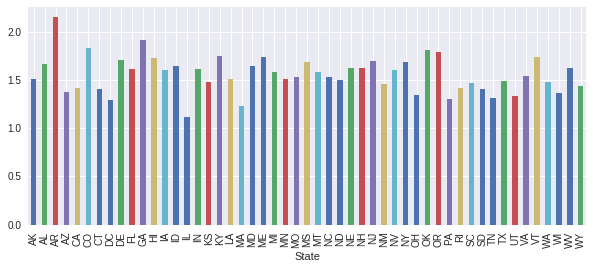

In [10]:
# 'Customer service calls'
# 'Total night minutes'

plt.figure(figsize=(10,4))
CV_data.groupby('State')['Customer service calls'].mean().plot(kind='bar')

## <font color=#FF103>TO DO: make a <font color=green>bar plot</font> on the percentage of users that quit for each state</font>

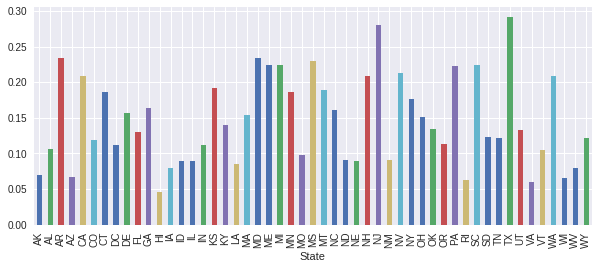

In [11]:
plt.figure(figsize=(10,4))
CV_data.groupby('State')['Churn'].mean().plot(kind='bar')

# ---- OTHER TESTS ------------------------------------------------

In [0]:
tmp=CV_data.groupby(['Churn'])['State'].value_counts()


In [0]:
Percentages2=CV_data.groupby(['Churn', 'State'])['State'].count()/CV_data.groupby([ 'State'])['State'].count()

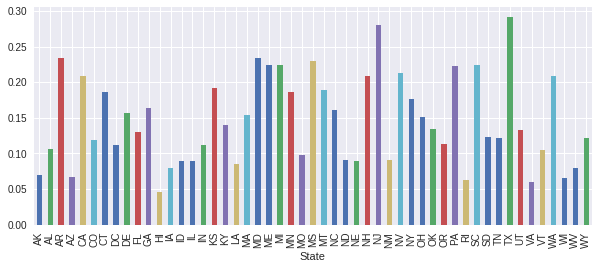

In [14]:
plt.figure(figsize=(10,4))
Percentages2[1].plot(kind='bar')

In [0]:
Perc_State=100*CV_data.groupby(['Churn'])['State'].value_counts()[0]/CV_data.groupby(['State'])['State'].count()

Text(0.5,1,u'Churn Percentage per State')

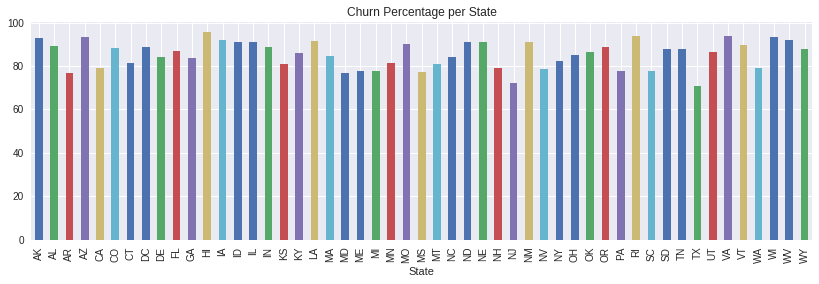

In [16]:
plt.figure(figsize=(14,4))
Perc_State.plot(kind='bar')
plt.title('Churn Percentage per State')

---

# <font color=qq6677>Now we prepare the data for testing several ML algorihms</font>

---


- ## <font color=FF103>TO DO: First Extract the Churn into a "1" "0" numpy vector = *y*

In [0]:
churn_result = CV_data['Churn']
y = np.where(churn_result==True,1,0)

In [0]:
y=np.array(CV_data['Churn'].astype(int))

- ## <font color=FF103>TO DO: Create a new Data Frame *churn_feat_space* by removing the columns in : *to_drop* list</font>
  
  

In [0]:
to_drop = ['State','Area code',
           'Total day charge','Total eve charge','Total night charge',
           'Total intl charge','Churn']

churn_feat_space = CV_data.drop(to_drop,axis=1)

In [20]:
churn_feat_space.head(6)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3
5,118,Yes,No,0,223.4,98,220.6,101,203.9,118,6.3,6,0


- ## <font color=FF103>TO DO: Finally convert columns with Yes / No values ('International plan', 'Voice mail plan')to "1" "0" values in *churn_feat_space*</font>


In [0]:
yes_no_cols = ['International plan', 'Voice mail plan']

churn_feat_space[yes_no_cols]=(churn_feat_space[yes_no_cols]=='Yes').astype(int)

In [22]:
churn_feat_space.head(6)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3
5,118,1,0,0,223.4,98,220.6,101,203.9,118,6.3,6,0


- ## <font color=FF103>TO DO: Finally convert *churn_feat_space* into a numpy array X_tmp</font>


In [0]:
X_tmp=np.array(churn_feat_space)

In [24]:
print('Number of Features:',X_tmp.shape[1])
print('Number of training examples:',X_tmp.shape[0])

('Number of Features:', 13)
('Number of training examples:', 2666)


- ## <font color=FF103>TO DO: Chech if features are "normalized" </font>


In [25]:
print('Features Means:',np.mean(X_tmp,axis=0))
print('Features Stds:',np.std(X_tmp,axis=0))

('Features Means:', array([1.00620405e+02, 1.01275319e-01, 2.74943736e-01, 8.02175544e+00,
       1.79481620e+02, 1.00310203e+02, 2.00386159e+02, 1.00023631e+02,
       2.01168942e+02, 1.00106152e+02, 1.02370218e+01, 4.46736684e+00,
       1.56264066e+00]))
('Features Stds:', array([39.55655286,  0.30169294,  0.44648592, 13.60972384, 54.20018228,
       19.98441312, 50.94195842, 20.15766354, 50.77079878, 19.41481634,
        2.78782558,  2.45573421,  1.31098982]))


- ## <font color=FF103>TO DO: use <font color=brown>Sklearn</font> to Normalize X_tmp into X </font>

- ### sklearn.preprocessing : [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)


In [26]:
# Standarization of features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#X=scaler.fit_transform(X_tmp)

scaler.fit(X_tmp)
X=scaler.transform(X_tmp)
print('Features Means:',np.mean(X,axis=0))
print('Features Stds:',np.std(X,axis=0))

('Features Means:', array([-1.29262276e-16, -6.59637386e-17,  9.59472561e-17, -2.66520156e-17,
        1.39923082e-16,  2.21211729e-16, -1.11938465e-16,  3.10495982e-16,
        5.99670351e-16, -2.19879129e-17, -2.03887919e-16, -5.93007347e-17,
       -5.59692327e-17]))
('Features Stds:', array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))


# See Pipelines....

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Fit to data using pipelined scaling, and PCA.
scaler_pca = make_pipeline(StandardScaler(), PCA(n_components=5))
X_PCA = scaler_pca.fit_transform(X_tmp)

# <font color=FF103>TO DO: apply the same process to TEST data churn-bigml-20.csv </font>

- ## Generate X_test and y_test 


In [28]:
Test_data = pd.read_csv("churn-bigml-20.csv")

y_test=np.array(Test_data['Churn'].astype(int))


Test_feat_space = Test_data.drop(to_drop,axis=1)

Test_feat_space[yes_no_cols]=(Test_feat_space[yes_no_cols]=='Yes').astype(int)

X_test_tmp=np.array(Test_feat_space)

# NOTE: Scaler trained with Training (80) Data

X_test = scaler.transform(X_test_tmp)

print('Test: Features Means:',np.mean(X_test,axis=0))
print('Test: Features Stds:',np.std(X_test,axis=0))

('Test: Features Means:', array([ 0.05613923, -0.07230878,  0.01884625,  0.02836506,  0.02705721,
        0.03136589,  0.05828522,  0.02247933, -0.02922221,  0.00040132,
        0.0004875 ,  0.02458299,  0.00082188]))
('Test: Features Stds:', array([1.03115328, 0.89646047, 1.00927902, 1.02749956, 1.02337297,
       1.01986957, 0.97526646, 0.93929796, 0.9793546 , 1.03824712,
       1.00642743, 1.01011759, 1.01629857]))


---
---


# <font color=green>Now: Fitting Models and Assessment</font>
http://dataaspirant.com/2017/04/15/implement-logistic-regression-model-python-binary-classification/

# <font color=FF103>TO DO: Fit a <font color=green>LogisticRegression</font> on X (churn-bigml-80.cv) and TEST data on churn-bigml-20.csv </font>



In [29]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X,y)

y_pred_train = logistic_regression_model.predict(X)
y_pred_test = logistic_regression_model.predict(X_test)

ACC_train= np.mean(y == y_pred_train)
ACC_test= np.mean(y_test == y_pred_test)

print("Accuracy: Classification Error on TRAIN Data using LR %f " % ACC_train)
print("Accuracy: Classification Error on TEST  Data using LR %f " % ACC_test)

Accuracy: Classification Error on TRAIN Data using LR 0.862716 
Accuracy: Classification Error on TEST  Data using LR 0.854573 


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# <font color=FF103>TO DO: Now fit a <font color=green>SVM</font> on X (churn-bigml-80.cv) and TEST data on churn-bigml-20.csv </font>

In [30]:
from sklearn.svm import SVC

SVM_model = SVC(probability=True)
SVM_model.fit(X,y)

y_pred_train = SVM_model.predict(X)
y_pred_test = SVM_model.predict(X_test)

ACC_SVM_train= np.mean(y == y_pred_train)
ACC_SVM_test= np.mean(y_test == y_pred_test)

print("Accuracy: Classification Error on TRAIN Data using SVM %f " % ACC_SVM_train)
print("Accuracy: Classification Error on TEST  Data using SVM %f " % ACC_SVM_test)

Accuracy: Classification Error on TRAIN Data using SVM 0.943736 
Accuracy: Classification Error on TEST  Data using SVM 0.920540 


# <font color=FF103>TO DO: ... what are the LR and SVM hyperparameters? are the "best"? </font>

In [31]:
logistic_regression_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
SVM_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

---
---

# <font color=FF103>TO DO: ... search for best SVM hyperparameters?  </font>
## See: [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)
---

## Try:

- ### Kernel rbf
- ### gamma values  1e-2, 1e-3
- ### C values , 1, 10, 100, 1000

In [33]:
# Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10]}]

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3], 'C': [1, 10, 100, 1000]}]

#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3], 'C': [1, 10, 100, 1000]},
#                          {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#scores = ['accuracy']
#scores = ['roc_auc']

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='roc_auc', n_jobs=-1, verbose=1)

clf.fit(X, y)


print("Best parameters set found on development set:")
print("\n")
print(clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best parameters set found on development set:


{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.885 (+/-0.063) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.878 (+/-0.066) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.892 (+/-0.052) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.879 (+/-0.063) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.892 (+/-0.047) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.882 (+/-0.058) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.888 (+/-0.056) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.01}
0.887 (+/-0.046) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.0s finished


In [34]:
from sklearn.metrics import classification_report

print("Detailed classification report:")
print("\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print("\n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))




Detailed classification report:


The model is trained on the full development set.
The scores are computed on the full evaluation set.


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       572
           1       0.87      0.47      0.61        95

   micro avg       0.91      0.91      0.91       667
   macro avg       0.89      0.73      0.78       667
weighted avg       0.91      0.91      0.90       667



# <font color=FF103>TO DO: ... now train SVM with the best set of hyperparameters and do the test on X_test </font>

In [35]:
from sklearn.svm import SVC

SVM_model = SVC(probability=True, kernel = 'rbf', C = 10, gamma= 0.01)

SVM_model.fit(X,y)

y_pred_train = SVM_model.predict(X)
y_pred_test = SVM_model.predict(X_test)

ACC_SVM_train= np.mean(y == y_pred_train)
ACC_SVM_test= np.mean(y_test == y_pred_test)

print("Accuracy: Classification Error on TRAIN Data using SVM %f " % ACC_SVM_train)
print("Accuracy: Classification Error on TEST  Data using SVM %f " % ACC_SVM_test)

Accuracy: Classification Error on TRAIN Data using SVM 0.917854 
Accuracy: Classification Error on TEST  Data using SVM 0.914543 


---
# <font color=red>See: </font>[Nested versus non-nested cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html)
---


# <font color=FF103>TO DO: remember it is very important to go beyond Accuracy   </font>
- ## Check what accuraccy we will have if you predict always "True" 

In [36]:
y_false_train = np.zeros(len(y))
y_false_test = np.zeros(len(y_test)) 

ACC_false_train= np.mean(y == y_false_train)
ACC_false_test= np.mean(y_test == y_false_test)

print("Accuracy: Classification Error on TRAIN Data using False %f " % ACC_false_train)
print("Accuracy: Classification Error on TEST  Data using False %f " % ACC_false_test)
print("\n")

print("Accuracy: Classification Error on TRAIN Data using SVM %f " % ACC_SVM_train)
print("Accuracy: Classification Error on TEST  Data using SVM %f " % ACC_SVM_test)
print("\n")

print("Accuracy: Classification Error on TRAIN Data using LR %f " % ACC_train)
print("Accuracy: Classification Error on TEST  Data using LR %f " % ACC_test)

Accuracy: Classification Error on TRAIN Data using False 0.854464 
Accuracy: Classification Error on TEST  Data using False 0.857571 


Accuracy: Classification Error on TRAIN Data using SVM 0.917854 
Accuracy: Classification Error on TEST  Data using SVM 0.914543 


Accuracy: Classification Error on TRAIN Data using LR 0.862716 
Accuracy: Classification Error on TEST  Data using LR 0.854573 


---
# <font color=FF103>TO DO: ... beyond Accuracy   </font>
- ## Explore the confusion matrix. on y_test  & y_pred_test with SVM  

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred_test)

array([[565,   7],
       [ 50,  45]])

- ## ... as with Deep Learning we can use the <font color=darkorange>PANDAS</font> confusion matrix

In [38]:
! pip install pandas_ml

    100% |████████████████████████████████| 81kB 3.1MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - \ done
  Stored in directory: /root/.cache/pip/wheels/4b/b0/88/51fb7203a0f81becae3e92d5bf9fee0460375e5408e67a7dc3
Successfully built pandas-ml


In [0]:
from pandas_ml import ConfusionMatrix

cm = ConfusionMatrix(y_test,y_pred_test)


In [40]:
cm.print_stats()

population: 667
P: 95
N: 572
PositiveTest: 52
NegativeTest: 615
TP: 45
TN: 565
FP: 7
FN: 50
TPR: 0.47368421052631576
TNR: 0.9877622377622378
PPV: 0.8653846153846154
NPV: 0.9186991869918699
FPR: 0.012237762237762238
FDR: 0.1346153846153846
FNR: 0.5263157894736842
ACC: 0.9145427286356822
F1_score: 0.6122448979591837
MCC: 0.6015086747231608
informedness: 0.46144644828855363
markedness: 0.7840838023764853
prevalence: 0.1424287856071964
LRP: 38.70676691729323
LRN: 0.5328365160689333
DOR: 72.64285714285714
FOR: 0.08130081300813008


Predicted  False  True  __all__
Actual                         
False        565     7      572
True          50    45       95
__all__      615    52      667


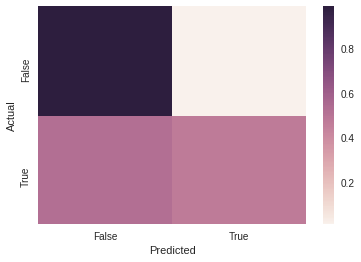

In [41]:
cm.plot(backend='seaborn',normalized=True)
print(cm)

---
# <font color=FF103>TO DO: ... beyond Accuracy   </font>
- ## Posterior probabilities are needed to analyze DET (or ROC) curves

In [0]:
# First get posteriors...
probs = SVM_model.predict_proba(X_test)

In [43]:
from sklearn import metrics

preds = probs[:,1]

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print('AUC : %f' % roc_auc)

AUC : 0.917832


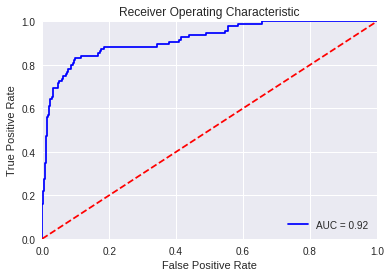

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


---
# <font color=FF103>TO DO: try improving the prediction of churn True cases  </font>

## See SVC docummentation: [sklearn SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

**class_weight : {dict, ‘balanced’}, optional**

     Set the parameter C of class i to class_weight[i]*C for SVC.
        example: class_weight={1: 10}
    
    If not given, all classes are supposed to have weight one.
    
    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

---


In [46]:
from sklearn.svm import SVC

SVM_model = SVC(probability=True, kernel = 'rbf', C = 10, gamma= 0.01, class_weight="balanced")


SVM_model.fit(X,y)

y_pred_train = SVM_model.predict(X)
y_pred_test = SVM_model.predict(X_test)

ACC_SVM_train= np.mean(y == y_pred_train)
ACC_SVM_test= np.mean(y_test == y_pred_test)

print("Accuracy: Classification Error on TRAIN Data using SVM %f " % ACC_SVM_train)
print("Accuracy: Classification Error on TEST  Data using SVM %f " % ACC_SVM_test)


Accuracy: Classification Error on TRAIN Data using SVM 0.878470 
Accuracy: Classification Error on TEST  Data using SVM 0.857571 


Predicted  False  True  __all__
Actual                         
False        491    81      572
True          14    81       95
__all__      505   162      667


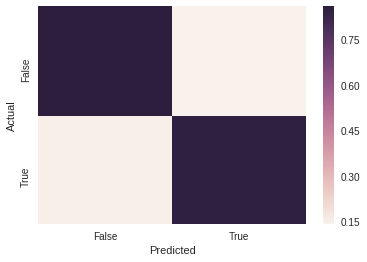

In [47]:
cm = ConfusionMatrix(y_test,y_pred_test)
cm.plot(backend='seaborn',normalized=True)
print(cm)

## Compare with QDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

- ## In this case you can use  *priors*=( ?? ,  ??)

### Sklearn documentation: [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)

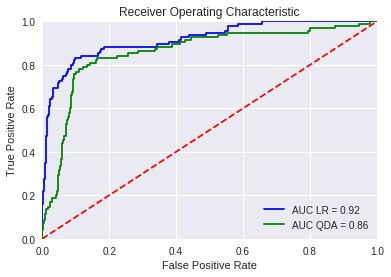

In [49]:
qda_model = QuadraticDiscriminantAnalysis(priors=(0.45,0.55))
qda_model.fit(X,y)

y_pred_qda = qda_model.predict(X_test)
probs_qda = qda_model.predict_proba(X_test)

preds_qda = probs_qda[:,1]
fpr_qda, tpr_qda, threshold_qda = metrics.roc_curve(y_test, preds_qda)
roc_auc_qda = metrics.auc(fpr_qda, tpr_qda)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC LR = %0.2f' % roc_auc)
plt.plot(fpr_qda, tpr_qda, 'g', label = 'AUC QDA = %0.2f' % roc_auc_qda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Predicted  False  True  __all__
Actual                         
False        453   119      572
True          16    79       95
__all__      469   198      667


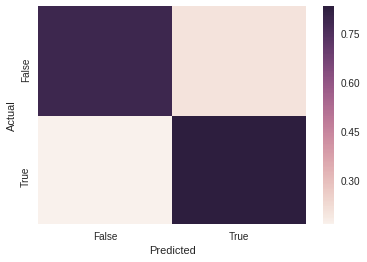

In [50]:
cm_qda = ConfusionMatrix(y_test, y_pred_qda)
cm_qda.plot(backend='seaborn',normalized=True)
print(cm_qda)

In [51]:
cm_qda.print_stats()

population: 667
P: 95
N: 572
PositiveTest: 198
NegativeTest: 469
TP: 79
TN: 453
FP: 119
FN: 16
TPR: 0.8315789473684211
TNR: 0.791958041958042
PPV: 0.398989898989899
NPV: 0.9658848614072495
FPR: 0.20804195804195805
FDR: 0.601010101010101
FNR: 0.16842105263157894
ACC: 0.7976011994002998
F1_score: 0.5392491467576792
MCC: 0.4769831334326744
informedness: 0.6235369893264631
markedness: 0.3648747603971485
prevalence: 0.1424287856071964
LRP: 3.9971693940734188
LRN: 0.21266411060764492
DOR: 18.795693277310924
FOR: 0.03411513859275053


---
---

# <font color=FF103>TO DO: In case you need "interpretability"  </font>

- ### USE:  max_depth=3

## <font color='green'>Using Classification Tree</font>

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3).fit(churn_feat_space, y)

In [53]:
print(tree_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


- ## To visualize the tree

In [54]:
! apt-get update
! apt-get autoremove graphviz
! apt-get install graphviz

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release.gpg [801 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [27.3 kB]
Get:13 https://developer

In [55]:
! pip install graphviz

In [56]:
! pip install pydotplus

## NOTE: we have used : labels=churn_feat_space.columns.tolist()

        To see the label names in the tree

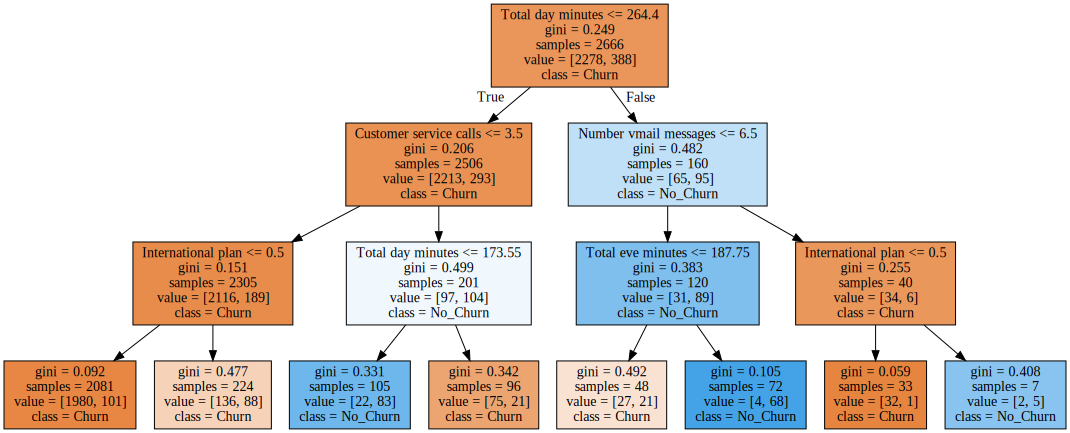

In [57]:
from sklearn.externals.six import StringIO
from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import SVG

dot_data = StringIO()

labels=churn_feat_space.columns.tolist()


graph = Source(tree.export_graphviz(tree_model, out_file=None
   , feature_names=labels
   , class_names=['Churn', 'No_Churn'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e0252eb90>]],
      dtype=object)

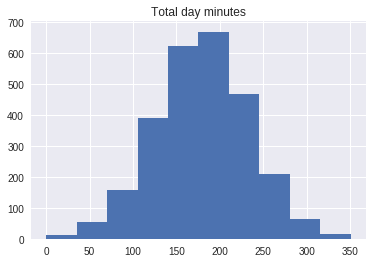

In [58]:
# NOTE : Scaling

churn_feat_space.hist('Total day minutes')


- ## Adding the ROC for the tree

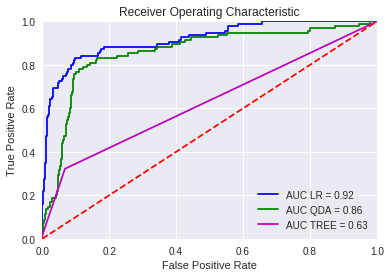

In [59]:

y_pred_tree = tree_model.predict(X)
probs_tree = tree_model.predict_proba(X)

preds_tree = probs_tree[:,1]
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(y, preds_tree)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC LR = %0.2f' % roc_auc)
plt.plot(fpr_qda, tpr_qda, 'g', label = 'AUC QDA = %0.2f' % roc_auc_qda)
plt.plot(fpr_tree, tpr_tree, 'm', label = 'AUC TREE = %0.2f' % roc_auc_tree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


---
# <font color=FF103>TO DO: ... try Gradient Boosting  </font>

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# boosting: many many weak classifiers (max_depth=1) refine themselves sequentially
# tree is the default the base classifier
estimator = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0)
estimator.fit(X, y)
y_pred = estimator.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2278
           1       0.71      0.34      0.46       388

   micro avg       0.88      0.88      0.88      2666
   macro avg       0.81      0.66      0.70      2666
weighted avg       0.87      0.88      0.87      2666



---
# <font color=FF103>TO DO: ... try Random Forest  </font>

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
RF_model = RandomForestClassifier(max_depth=10,min_samples_split=20).fit(X, y)
RF_model.fit(X, y)
y_pred_RF = RF_model.predict(X)
print(classification_report(y, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2278
           1       0.98      0.75      0.85       388

   micro avg       0.96      0.96      0.96      2666
   macro avg       0.97      0.87      0.91      2666
weighted avg       0.96      0.96      0.96      2666



/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
RF_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# <font color=FF103>TO DO: ... review how you can with Random Forest study <font color=green>Feature importances  </font>

Feature ranking:
1. feature Total day minutes (0.270241)
2. feature Customer service calls (0.175458)
3. feature International plan (0.112739)
4. feature Total eve minutes (0.081887)
5. feature Total intl calls (0.080874)
6. feature Total intl minutes (0.074541)
7. feature Total day calls (0.037466)
8. feature Account length (0.037264)
9. feature Total night minutes (0.034118)
10. feature Voice mail plan (0.030146)
11. feature Total eve calls (0.025958)
12. feature Number vmail messages (0.021293)
13. feature Total night calls (0.018016)


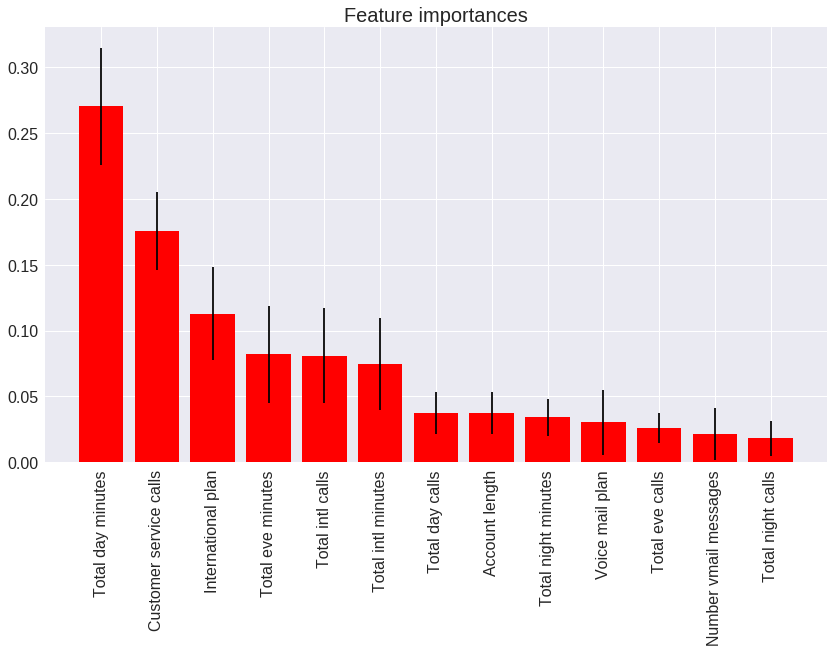

In [64]:
labels=churn_feat_space.columns.tolist()


importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, labels[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(14,8))
plt.title("Feature importances", fontsize=20)
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [labels[k] for k in indices],rotation='vertical')
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

plt.xlim([-1, X.shape[1]])
plt.show()

---
# <font color=FF103>TO DO: ... try GridSearch for Random Forest  </font>

In [0]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [66]:
from sklearn.ensemble import RandomForestClassifier

from time import time

RF_grid = RandomForestClassifier(n_estimators=20)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(RF_grid, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 50.23 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.952 (std: 0.011)
Parameters: {'max_features': 10, 'min_samples_split': 2, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': None}

Model with rank: 2
Mean validation score: 0.951 (std: 0.008)
Parameters: {'max_features': 10, 'min_samples_split': 2, 'bootstrap': True, 'criterion': 'gini', 'max_depth': None}

Model with rank: 3
Mean validation score: 0.950 (std: 0.010)
Parameters: {'max_features': 10, 'min_samples_split': 3, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': None}

Model with rank: 3
Mean validation score: 0.950 (std: 0.007)
Parameters: {'max_features': 10, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': None}



# <font color=brown>You can also use: Model selection with Cross validation</font> using scikit-learn libraries.
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

https://scikit-learn.org/stable/modules/cross_validation.html#k-fold



In [0]:
from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))


In [68]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.861574 (0.024194)
LDA: 0.856708 (0.020486)
QDA: 0.864962 (0.013882)


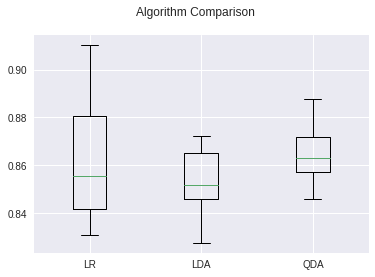

In [69]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()